# Import Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
import albumentations as A
from functools import partial
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.utils import shuffle
from sklearn.utils import class_weight
import cv2
import gc
#from tensorflow.keras import mixed_precision as mixed_precision
from tensorflow import keras
from tensorflow.keras import layers
from shutil import copyfile
import cv2
from tensorflow.keras import mixed_precision

tfk = tf.keras
tfkl = tf.keras.layers

AUTOTUNE = tf.data.experimental.AUTOTUNE

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)
print(tf.__version__)

Your GPU may run slowly with dtype policy mixed_float16 because it does not have compute capability of at least 7.0. Your GPU:
  METAL, no compute capability (probably not an Nvidia GPU)
See https://developer.nvidia.com/cuda-gpus for a list of GPUs and their compute capabilities.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once
2.10.0


# CutOut

training/
Species1
../dataset_splitted/training/Species1/00132.jpg
../dataset_splitted/training/Species1/00046.jpg
../dataset_splitted/training/Species1/00052.jpg
../dataset_splitted/training/Species1/00085.jpg
../dataset_splitted/training/Species1/00091.jpg
../dataset_splitted/training/Species1/00047.jpg
../dataset_splitted/training/Species1/00127.jpg
../dataset_splitted/training/Species1/00133.jpg
../dataset_splitted/training/Species1/00125.jpg
../dataset_splitted/training/Species1/00131.jpg
../dataset_splitted/training/Species1/00119.jpg
../dataset_splitted/training/Species1/00051.jpg
../dataset_splitted/training/Species1/00045.jpg
../dataset_splitted/training/Species1/00079.jpg
../dataset_splitted/training/Species1/00092.jpg
../dataset_splitted/training/Species1/00086.jpg
../dataset_splitted/training/Species1/00087.jpg
../dataset_splitted/training/Species1/00093.jpg
../dataset_splitted/training/Species1/00050.jpg
../dataset_splitted/training/Species1/00118.jpg
../dataset_splitted/t

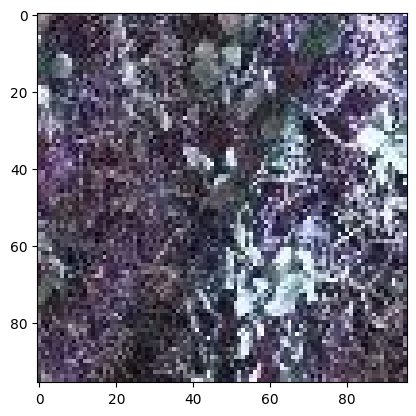

In [165]:
image_size = 96
# Declare an augmentation pipeline
transform = A.Compose([
    A.RandomResizedCrop(image_size, image_size),
            A.Transpose(p=0.5),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.5),
            A.ShiftScaleRotate(p=0.5),
            A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5),
            A.RandomBrightnessContrast(brightness_limit=(-0.1, 0.1), contrast_limit=(-0.1, 0.1), p=0.5),
            A.CoarseDropout(p=0.5),
            A.Cutout(p=0.5), 
    ], p=1)


labels = ['Species1', 'Species2', 'Species3', 'Species4', 'Species5', 'Species6', 'Species7', 'Species8']
def get_images(abels, dataset_path):
    # crete a directory for each set and for each label
    sets = ['training/', 'validation/', 'testing/']
    for set in sets:
        for label in labels:
            os.makedirs("../chad_dataset/" + set + label, exist_ok=True)
    
    for set in sets:
        print(set)
        # Iterate over testing, training and validation sets
        for label in labels:
            print(label)
            # Iterate over all images in the folder
            for file in os.listdir(dataset_path + set + label):
                image = dataset_path + set + label + "/" + file
                print(dataset_path + set + label+ "/" +file)
                # Read an image with OpenCV and convert it to the RGB colorspace
                image = cv2.imread(image)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Augment an image
                transformed = transform(image=image)
                transformed_image = transformed["image"]
                
                # Write the transformed image to the new folder
                cv2.imwrite("../chad_dataset/" + set + label + "/" + file, transformed_image)                
                
                # copy the image to the new folder
                #copyfile(dataset_path + set + label + '/' + file, "../chad_dataset/" + set + label + '/' +file)
                
                    
get_images(labels, '../dataset_splitted/')